# Getting Basic Data

In [1]:
import pandas as pd
import re
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data, feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus, genre_as_graph


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/theatreclassique/"

In [3]:
topics_texts_df = pd.read_csv(wdir + "topics_texts.csv", sep="\t", index_col= 0)

In [4]:
topics_texts_df.head()

,Topic 0: proscrit abusée perdent,Topic 1: immortels hors triomphant,Topic 2: tomber sus artifice,Topic 3: fièvre trahi croyant,Topic 4: voyait promène sut,Topic 5: efforts craigne penchant,Topic 6: prévenue perce criminelle,Topic 7: tourmente pleurant gémir,Topic 8: public suivons tempête,Topic 9: restez entrons succombe,...,Topic 290: animée tenez roméo,Topic 291: barbarie prose malaisé,Topic 292: mauvaises reçue plaint,Topic 293: aveuglement étrangère jadis,Topic 294: plairait gagne devez,Topic 295: fous unie plan,Topic 296: regarde nullement reconnu,Topic 297: dévore versé antoine,Topic 298: compliments ordinaire modeste,Topic 299: justement accusez ennuis
tc0001,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,...,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,1.656075e-07,0.065675,1.656075e-07,0.060601,1.656075e-07,1.656075e-07
tc0002,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,...,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,1.689249e-07,0.061670,1.689249e-07,0.061112,1.689249e-07,1.689249e-07
tc0003,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,...,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,1.669053e-07,0.062807,1.669053e-07,0.062350,1.669053e-07,1.669053e-07
tc0004,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,...,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,1.687830e-07,0.064690,1.687830e-07,0.059374,1.687830e-07,1.687830e-07
tc0005,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,...,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,1.649726e-07,0.067694,1.649726e-07,0.066249,1.649726e-07,1.649726e-07


In [5]:
metadata_df = pd.read_csv(wdir+"metadata/metadata.csv", sep = ",", index_col=0)

In [6]:
metadata_df

,idno,author-short,title-short,title-full,year-performance,genre,subgenre,subgenre-simple,structure,form,decade,location,country,periode
tc0537,tc0537,Taconet,Écosseuses-halle,Les écosseuses de la halle,1767,drama,Ambigu poissard,autre,un acte,vers,1760s,Paris,France,XVIIIème
tc0296,tc0296,LaFontaine,Rieurs,Les rieurs du beau-richard,(non représentée),drama,Ballet,ballet,un acte,vers,(non représentée0s,Château-Thierry,France,XVIIème
tc0323,tc0323,Rousseau,Muses-galantes,Les muses galantes,1744,drama,Ballet,ballet,"trois actes, un prologue",vers,1740s,Mont Parnasse,Pays mythologique,Temps mythologiques
tc0354,tc0354,Regnard,Carnaval-Venise,Le carnaval de venise,1699,drama,Ballet,ballet,trois actes,vers,1690s,(indéterminé),France,XVIIIème
tc0602,tc0602,Boursault,Fête-Seine,La fête de la seine,1690,drama,Ballet,ballet,un acte,vers,1690s,Lieu mythologique,Pays mythologique,Temps mythologiques
tc0746,tc0746,Rousseau,Devin-village,Le devin du village,1752,drama,Bergerie,autre,un acte,vers,1750s,France,France,(inconnue)
tc0765,tc0765,Rousseau,Engagement-téméraire,L'engagement téméraire,1747,drama,Bergerie,autre,un acte,vers,1740s,France,France,XVIIIème
tc0001,tc0001,Maréchal,Railleur,Le railleur,1636,drama,Comédie,comédie,cinq actes,vers,1630s,Paris,France,XVIIème
tc0002,tc0002,Dufresny,Faux-instinct,Le faux instinct,1707,drama,Comédie,comédie,cinq actes,prose,1700s,(non indiqué),France,XVIIIème
tc0003,tc0003,CarbonDeFlins,Mari-directeur,Le mari directeur ou le déménagement du couvent,1791,drama,Comédie,comédie,un acte,vers,1790s,France,France,XVIIIème


In [7]:
metadata_df["title-author"] = metadata_df["author-short"] + ", by "+metadata_df["title-short"]

In [8]:
metadata_df["title-author"]

tc0537                         Taconet, by Écosseuses-halle
tc0296                                LaFontaine, by Rieurs
tc0323                          Rousseau, by Muses-galantes
tc0354                          Regnard, by Carnaval-Venise
tc0602                             Boursault, by Fête-Seine
tc0746                           Rousseau, by Devin-village
tc0765                    Rousseau, by Engagement-téméraire
tc0001                                Maréchal, by Railleur
tc0002                           Dufresny, by Faux-instinct
tc0003                     CarbonDeFlins, by Mari-directeur
tc0004                                Piron, by École-pères
tc0007                       CailhavaDEstendoux, by Égoïsme
tc0012                             Pompigny, by Noeud-amour
tc0015                        Dufresny, by Adieux-officiers
tc0019                     Molière, by Précieuses-ridicules
tc0023                              CorneilleP, by Suivante
tc0025                           Brécour

In [9]:
genres_lt = sorted(list(set(metadata_df["subgenre-simple"])))

In [10]:
genres_lt

['autre',
 'ballet',
 'comédie',
 'comédie-ballet ',
 'comédie-héroïque',
 'dialogue',
 'divertissement',
 'drame',
 'farce',
 'monologue',
 'opuscule-dramatique',
 'opéra',
 'opéra-comique',
 'parade ',
 'parodie',
 'pastorale',
 'pièce',
 'prologue',
 'proverbe',
 'tragicomédie',
 'tragédie',
 'tragédie-en-musique',
 'tragédie-lyrique',
 'vaudeville']

In [11]:
len(genres_lt)

24

In [12]:
books_genre_boolean_df = pd.get_dummies(metadata_df["subgenre-simple"])

In [13]:
books_genre_boolean_df

,autre,ballet,comédie,comédie-ballet,comédie-héroïque,dialogue,divertissement,drame,farce,monologue,...,parodie,pastorale,pièce,prologue,proverbe,tragicomédie,tragédie,tragédie-en-musique,tragédie-lyrique,vaudeville
tc0537,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0296,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0602,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0746,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0765,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0001,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning Features

In [14]:

topics_texts_df = text2features.calculate_zscore(topics_texts_df)

In [15]:
topics_texts_df = text2features.calculate_minmax(topics_texts_df)

In [16]:
topics_texts_df

,Topic 0: proscrit abusée perdent,Topic 1: immortels hors triomphant,Topic 2: tomber sus artifice,Topic 3: fièvre trahi croyant,Topic 4: voyait promène sut,Topic 5: efforts craigne penchant,Topic 6: prévenue perce criminelle,Topic 7: tourmente pleurant gémir,Topic 8: public suivons tempête,Topic 9: restez entrons succombe,...,Topic 290: animée tenez roméo,Topic 291: barbarie prose malaisé,Topic 292: mauvaises reçue plaint,Topic 293: aveuglement étrangère jadis,Topic 294: plairait gagne devez,Topic 295: fous unie plan,Topic 296: regarde nullement reconnu,Topic 297: dévore versé antoine,Topic 298: compliments ordinaire modeste,Topic 299: justement accusez ennuis
tc0001,0.311139,0.311139,0.311139,0.311139,0.311139,0.311139,0.311139,0.311139,0.311139,0.311139,...,0.311139,0.311139,0.311139,0.311139,0.311139,0.615807,0.311139,0.438836,0.311139,0.311139
tc0002,0.576419,0.576419,0.576419,0.576419,0.576419,0.576419,0.576419,0.576419,0.576419,0.576419,...,0.576419,0.576419,0.576419,0.576419,0.576419,0.467809,0.576419,0.452645,0.576419,0.576419
tc0003,0.414921,0.414921,0.414921,0.414921,0.414921,0.414921,0.414921,0.414921,0.414921,0.414921,...,0.414921,0.414921,0.414921,0.414921,0.414921,0.509826,0.414921,0.486076,0.414921,0.414921
tc0004,0.565068,0.565068,0.565068,0.565068,0.565068,0.565068,0.565068,0.565068,0.565068,0.565068,...,0.565068,0.565068,0.565068,0.565068,0.565068,0.579424,0.565068,0.405711,0.565068,0.565068
tc0005,0.260372,0.260372,0.260372,0.260372,0.260372,0.260372,0.260372,0.260372,0.260372,0.260372,...,0.260372,0.260372,0.260372,0.260372,0.260372,0.690423,0.260372,0.591380,0.260372,0.260372
tc0006,0.433662,0.433662,0.433662,0.433662,0.433662,0.433662,0.433662,0.433662,0.433662,0.433662,...,0.433662,0.433662,0.433662,0.433662,0.433662,0.681119,0.433662,0.481785,0.433662,0.433662
tc0007,0.476057,0.476057,0.476057,0.476057,0.476057,0.476057,0.476057,0.476057,0.476057,0.476057,...,0.476057,0.476057,0.476057,0.476057,0.476057,0.599885,0.476057,0.509847,0.476057,0.476057
tc0008,0.355951,0.355951,0.355951,0.355951,0.355951,0.355951,0.355951,0.355951,0.355951,0.355951,...,0.355951,0.355951,0.355951,0.355951,0.355951,0.739838,0.355951,0.684144,0.355951,0.355951
tc0009,0.607138,0.607138,0.607138,0.607138,0.607138,0.607138,0.607138,0.607138,0.607138,0.607138,...,0.607138,0.607138,0.607138,0.607138,0.607138,0.687544,0.607138,0.346947,0.607138,0.607138
tc0010,0.186473,0.186473,0.186473,0.186473,0.186473,0.186473,0.186473,0.186473,0.186473,0.186473,...,0.186473,0.186473,0.186473,0.186473,0.186473,0.606688,0.186473,0.563658,0.186473,0.186473


In [17]:
results_features_df = genre_as_graph.results_features(books_genre_boolean_df, genres_lt, topics_texts_df)
results_features_df.head(20)

,Topic 0: proscrit abusée perdent,Topic 1: immortels hors triomphant,Topic 2: tomber sus artifice,Topic 3: fièvre trahi croyant,Topic 4: voyait promène sut,Topic 5: efforts craigne penchant,Topic 6: prévenue perce criminelle,Topic 7: tourmente pleurant gémir,Topic 8: public suivons tempête,Topic 9: restez entrons succombe,...,Topic 290: animée tenez roméo,Topic 291: barbarie prose malaisé,Topic 292: mauvaises reçue plaint,Topic 293: aveuglement étrangère jadis,Topic 294: plairait gagne devez,Topic 295: fous unie plan,Topic 296: regarde nullement reconnu,Topic 297: dévore versé antoine,Topic 298: compliments ordinaire modeste,Topic 299: justement accusez ennuis
autre,0.491624,0.491624,0.491624,0.491624,0.491624,0.491624,0.491624,0.491624,0.491624,0.491624,...,0.491624,0.491624,0.491624,0.491624,0.491624,0.526339,0.491624,0.418095,0.491624,0.491624
ballet,0.429908,0.429908,0.429908,0.429908,0.429908,0.429908,0.429908,0.429908,0.429908,0.429908,...,0.429908,0.429908,0.429908,0.429908,0.429908,0.488373,0.429908,0.475908,0.429908,0.429908
comédie,0.538187,0.538187,0.538187,0.538187,0.538187,0.538187,0.538187,0.538187,0.538187,0.538187,...,0.538187,0.538187,0.538187,0.538187,0.538187,0.489115,0.538187,0.422201,0.538187,0.538187
comédie-ballet,0.559392,0.559392,0.559392,0.559392,0.559392,0.559392,0.559392,0.559392,0.559392,0.559392,...,0.559392,0.559392,0.559392,0.559392,0.559392,0.548873,0.559392,0.356268,0.559392,0.559392
comédie-héroïque,0.434731,0.434731,0.434731,0.434731,0.434731,0.434731,0.434731,0.434731,0.434731,0.434731,...,0.434731,0.434731,0.434731,0.434731,0.434731,0.540968,0.434731,0.502030,0.434731,0.434731
dialogue,0.513237,0.513237,0.513237,0.513237,0.513237,0.513237,0.513237,0.513237,0.513237,0.513237,...,0.513237,0.513237,0.513237,0.513237,0.513237,0.487709,0.513237,0.459618,0.513237,0.513237
divertissement,0.499526,0.499526,0.499526,0.499526,0.499526,0.499526,0.499526,0.499526,0.499526,0.499526,...,0.499526,0.499526,0.499526,0.499526,0.499526,0.382883,0.499526,0.553324,0.499526,0.499526
drame,0.434192,0.434192,0.434192,0.434192,0.434192,0.434192,0.434192,0.434192,0.434192,0.434192,...,0.434192,0.434192,0.434192,0.434192,0.434192,0.548888,0.434192,0.531658,0.434192,0.434192
farce,0.698567,0.698567,0.698567,0.698567,0.698567,0.698567,0.698567,0.698567,0.698567,0.698567,...,0.698567,0.698567,0.698567,0.698567,0.698567,0.465870,0.698567,0.387579,0.698567,0.698567
monologue,0.493500,0.493500,0.493500,0.493500,0.493500,0.493500,0.493500,0.493500,0.493500,0.493500,...,0.493500,0.493500,0.493500,0.493500,0.493500,0.525823,0.493500,0.495884,0.493500,0.493500


# Classifying

In [ ]:
classification_results_theatre_df = classify.classify(wdir, freq_table  = topics_texts_df, metadata = books_genre_boolean_df,
             sep = "\t", classes = books_genre_boolean_df.columns.tolist(), verbose = True, methods = ["SVC","LR"], min_MFF = 0,
             max_MFFs = [50,100,200,300], text_representations = ["log","raw"], typographies = [True],
             sampling_mode = "cross", 
             minimal_value_samples = 2, make_relative = False,
             under_sample_method = "lpc", maximum_cases = 5000, sampling_times = 3, outdir_results = "",
             )


In [ ]:
classification_results_theatre_df = classification_results_bible_df

In [43]:
classification_results_theatre_df.to_csv(wdir + "results_theatre.csv", sep="\t")

In [19]:
classification_results_theatre_df = pd.read_csv(wdir + "results_theatre.csv", sep="\t")

In [20]:
topics_texts_df.shape

(848, 300)

In [21]:
classification_results_theatre_df.head()

,Unnamed: 0,class,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
0,209,parade,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,log,50,True,[1. 0.67 1. 1. 1. 1. 1. 1. 0. ...,2.587770e-06,tc0527 0\ntc0623 0\ntc0605 1\ntc0486 ...,12,6,3,"LogisticRegression(C=1.0, class_weight=None, d..."
1,219,parade,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,raw,100,True,[0.67 1. 1. 1. 1. 1. 1. 1. 1. ...,3.960373e-15,tc0507 1\ntc0486 1\ntc0027 0\ntc0103 ...,12,6,3,"LogisticRegression(C=1.0, class_weight=None, d..."
2,370,vaudeville,1.0,1.0,1.0,1.0,1.0,0.5,0.5,SVC,log,100,True,[0. 0.67 1. 0.67 1. 1. 1. 1. 1. ],2.338519e-02,tc0458 1\ntc0054 1\ntc0525 1\ntc0706 ...,6,3,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
3,380,vaudeville,1.0,1.0,1.0,1.0,1.0,0.5,0.5,SVC,raw,200,True,[0. 0. 0.67 0. 0.67 0.67 1. 1. 1. ],7.152884e-01,tc0024 0\ntc0458 1\ntc0108 0\ntc0259 ...,6,3,3,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
4,341,tragédie-en-musique,1.0,1.0,1.0,1.0,1.0,0.5,0.5,LR,log,200,True,[0. 0.67 0. 0.67 0.67 0.67 0. 0.67 1. ...,3.540569e-01,tc0331 1\ntc0438 1\ntc0211 0\ntc0542 ...,8,4,3,"LogisticRegression(C=1.0, class_weight=None, d..."


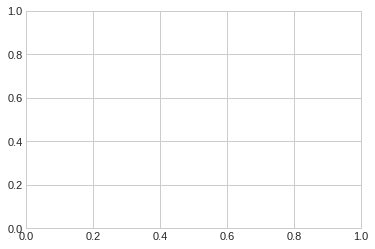

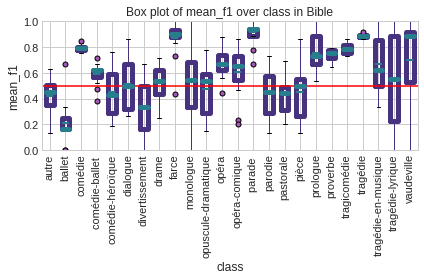

In [22]:
describe_data.boxplots(classification_results_theatre_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(10), "mean_f1", "class", wdir,"Bible", rotation=90, baseline=0.5)


In [23]:
results_classification_df = classification_results_theatre_df.sort_values(by="mean_f1",ascending=False).groupby(["class","MFW","text_representation"]).head(1).groupby(["class"]).mean()



In [24]:
results_classification_df

,Unnamed: 0,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,,,,
autre,7.625,0.524750,0.600000,0.487500,0.504125,0.568750,0.5,0.024750,162.5,True,4.992791e-01,20.0,10.0,3.0
ballet,23.750,0.291750,0.375000,0.250000,0.333250,0.437500,0.5,-0.208250,162.5,True,2.078217e-01,8.0,4.0,3.0
comédie,39.125,0.804500,0.889125,0.736500,0.779750,0.782875,0.5,0.304500,162.5,True,2.197458e-25,766.0,10.0,3.0
comédie-ballet,55.625,0.624875,0.731875,0.571250,0.583250,0.669500,0.5,0.124875,162.5,True,2.422983e-01,14.0,7.0,3.0
comédie-héroïque,71.375,0.565500,0.678500,0.508875,0.529875,0.624875,0.5,0.065500,162.5,True,4.146751e-01,14.0,7.0,3.0
dialogue,87.375,0.658375,0.800000,0.587500,0.549875,0.637500,0.5,0.158375,162.5,True,3.518665e-01,10.0,5.0,3.0
divertissement,103.375,0.437375,0.479125,0.416500,0.534750,0.625000,0.5,-0.062625,162.5,True,3.127598e-01,12.0,6.0,3.0
drame,119.500,0.584500,0.731250,0.508375,0.478750,0.565625,0.5,0.084500,162.5,True,3.807233e-01,28.0,10.0,3.0
farce,135.375,0.930000,0.987500,0.900125,0.881750,0.909375,0.5,0.430000,162.5,True,7.441469e-08,22.0,10.0,3.0


# Create Nodes 

In [25]:
amount_of_features_per_subgenre = 20
amount_of_texts_per_subgenre = 2
amount_of_features_per_text = 5

std_deviation_of_feature_in_subgenre = 0.5
std_deviation_of_feature_in_text = 4.0
#20 	5 	5 	0.5 	4.0
# visually good results, but no correlation with 10 2  5 0.01 2
# good results with 20 2  5 0.5 2
# very good results with 10 2  5 0.5 2


In [26]:
genres_nodes_df = pd.DataFrame(genres_lt , index = genres_lt, columns=["label"])

In [27]:
genres_nodes_df["node"] = genres_nodes_df["label"]
genres_nodes_df["size"] = 10
genres_nodes_df["type"] = "subgenre"

In [28]:
genres_nodes_df

,label,node,size,type
autre,autre,autre,10,subgenre
ballet,ballet,ballet,10,subgenre
comédie,comédie,comédie,10,subgenre
comédie-ballet,comédie-ballet,comédie-ballet,10,subgenre
comédie-héroïque,comédie-héroïque,comédie-héroïque,10,subgenre
dialogue,dialogue,dialogue,10,subgenre
divertissement,divertissement,divertissement,10,subgenre
drame,drame,drame,10,subgenre
farce,farce,farce,10,subgenre
monologue,monologue,monologue,10,subgenre


In [29]:
metadata_df

,idno,author-short,title-short,title-full,year-performance,genre,subgenre,subgenre-simple,structure,form,decade,location,country,periode,title-author
tc0537,tc0537,Taconet,Écosseuses-halle,Les écosseuses de la halle,1767,drama,Ambigu poissard,autre,un acte,vers,1760s,Paris,France,XVIIIème,"Taconet, by Écosseuses-halle"
tc0296,tc0296,LaFontaine,Rieurs,Les rieurs du beau-richard,(non représentée),drama,Ballet,ballet,un acte,vers,(non représentée0s,Château-Thierry,France,XVIIème,"LaFontaine, by Rieurs"
tc0323,tc0323,Rousseau,Muses-galantes,Les muses galantes,1744,drama,Ballet,ballet,"trois actes, un prologue",vers,1740s,Mont Parnasse,Pays mythologique,Temps mythologiques,"Rousseau, by Muses-galantes"
tc0354,tc0354,Regnard,Carnaval-Venise,Le carnaval de venise,1699,drama,Ballet,ballet,trois actes,vers,1690s,(indéterminé),France,XVIIIème,"Regnard, by Carnaval-Venise"
tc0602,tc0602,Boursault,Fête-Seine,La fête de la seine,1690,drama,Ballet,ballet,un acte,vers,1690s,Lieu mythologique,Pays mythologique,Temps mythologiques,"Boursault, by Fête-Seine"
tc0746,tc0746,Rousseau,Devin-village,Le devin du village,1752,drama,Bergerie,autre,un acte,vers,1750s,France,France,(inconnue),"Rousseau, by Devin-village"
tc0765,tc0765,Rousseau,Engagement-téméraire,L'engagement téméraire,1747,drama,Bergerie,autre,un acte,vers,1740s,France,France,XVIIIème,"Rousseau, by Engagement-téméraire"
tc0001,tc0001,Maréchal,Railleur,Le railleur,1636,drama,Comédie,comédie,cinq actes,vers,1630s,Paris,France,XVIIème,"Maréchal, by Railleur"
tc0002,tc0002,Dufresny,Faux-instinct,Le faux instinct,1707,drama,Comédie,comédie,cinq actes,prose,1700s,(non indiqué),France,XVIIIème,"Dufresny, by Faux-instinct"
tc0003,tc0003,CarbonDeFlins,Mari-directeur,Le mari directeur ou le déménagement du couvent,1791,drama,Comédie,comédie,un acte,vers,1790s,France,France,XVIIIème,"CarbonDeFlins, by Mari-directeur"


In [30]:
texts_nodes_df = metadata_df[["title-author","idno"]]

In [31]:
texts_nodes_df = texts_nodes_df.rename(columns={"title-author":"label","idno":"node"})

In [32]:
texts_nodes_df["size"] = 3
texts_nodes_df["type"] = "text"

In [33]:
texts_nodes_df

,label,node,size,type
tc0537,"Taconet, by Écosseuses-halle",tc0537,3,text
tc0296,"LaFontaine, by Rieurs",tc0296,3,text
tc0323,"Rousseau, by Muses-galantes",tc0323,3,text
tc0354,"Regnard, by Carnaval-Venise",tc0354,3,text
tc0602,"Boursault, by Fête-Seine",tc0602,3,text
tc0746,"Rousseau, by Devin-village",tc0746,3,text
tc0765,"Rousseau, by Engagement-téméraire",tc0765,3,text
tc0001,"Maréchal, by Railleur",tc0001,3,text
tc0002,"Dufresny, by Faux-instinct",tc0002,3,text
tc0003,"CarbonDeFlins, by Mari-directeur",tc0003,3,text


In [34]:
features_nodes_df = pd.DataFrame(sorted(list(set(topics_texts_df.columns.tolist()))), index = sorted(list(set(topics_texts_df.columns.tolist()))), columns = ["label"])

In [35]:
features_nodes_df["type"] = "feature"
features_nodes_df["size"] = 2
features_nodes_df["node"] = features_nodes_df["label"]


In [36]:
features_nodes_df.head()

,label,type,size,node
Topic 0: \nproscrit abusée perdent,Topic 0: \nproscrit abusée perdent,feature,2,Topic 0: \nproscrit abusée perdent
Topic 100: \nassurés destinées honteuse,Topic 100: \nassurés destinées honteuse,feature,2,Topic 100: \nassurés destinées honteuse
Topic 101: \nsouhaits sortes délices,Topic 101: \nsouhaits sortes délices,feature,2,Topic 101: \nsouhaits sortes délices
Topic 102: \ngardes rassurer jean,Topic 102: \ngardes rassurer jean,feature,2,Topic 102: \ngardes rassurer jean
Topic 103: \nmets venus ruiner,Topic 103: \nmets venus ruiner,feature,2,Topic 103: \nmets venus ruiner


In [37]:
nodes_df = pd.concat([genres_nodes_df[["node","size","type","label"]], texts_nodes_df[["node","size","type","label"]], features_nodes_df[["node","size","type","label"]] ], axis=0).fillna("")

In [38]:
nodes_df

,node,size,type,label
autre,autre,10,subgenre,autre
ballet,ballet,10,subgenre,ballet
comédie,comédie,10,subgenre,comédie
comédie-ballet,comédie-ballet,10,subgenre,comédie-ballet
comédie-héroïque,comédie-héroïque,10,subgenre,comédie-héroïque
dialogue,dialogue,10,subgenre,dialogue
divertissement,divertissement,10,subgenre,divertissement
drame,drame,10,subgenre,drame
farce,farce,10,subgenre,farce
monologue,monologue,10,subgenre,monologue


In [39]:
nodes_df.shape

(1172, 4)

# Create Edges

In [40]:
subgenre_features_edges_df = genre_as_graph.make_subgenre_features_edges(results_features_df,  amount_of_features_per_subgenre, std_deviation_of_feature_in_subgenre, semantic_subgenres_lt = genres_lt)

In [41]:
subgenre_features_edges_df["weight"] = subgenre_features_edges_df["weight"]
subgenre_features_edges_df

,source,target,weight,type
0,autre,Topic 75: \nqualité li famille,0.551755,subgenre-feature
1,autre,Topic 295: \nfous unie plan,0.526339,subgenre-feature
2,autre,Topic 204: \nsuivent monarque martyre,0.510606,subgenre-feature
3,ballet,Topic 204: \nsuivent monarque martyre,0.616360,subgenre-feature
4,ballet,Topic 268: \nchaînes astres envoyer,0.521395,subgenre-feature
5,ballet,Topic 34: \nlangue monnaie compassion,0.517432,subgenre-feature
6,ballet,Topic 166: \nprésenté artifice charité,0.517152,subgenre-feature
7,comédie,Topic 34: \nlangue monnaie compassion,0.551294,subgenre-feature
8,comédie,Topic 204: \nsuivent monarque martyre,0.544407,subgenre-feature
9,comédie,Topic 195: \nparfaitement avance confident,0.538187,subgenre-feature


In [42]:
books_genre_boolean_df

,autre,ballet,comédie,comédie-ballet,comédie-héroïque,dialogue,divertissement,drame,farce,monologue,...,parodie,pastorale,pièce,prologue,proverbe,tragicomédie,tragédie,tragédie-en-musique,tragédie-lyrique,vaudeville
tc0537,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0296,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0354,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0602,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0746,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0765,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0001,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tc0003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def make_subgenres_novels_edges(new_metadata_df, semantic_subgenres_lt, amount_of_texts_per_subgenre):

    rel_labels_df = new_metadata_df[semantic_subgenres_lt]
    
    edges_subgenres_novels_lt = []
    
    for subgenre in semantic_subgenres_lt:
        for index, row in rel_labels_df.loc[rel_labels_df[subgenre]> 0].iloc[0:amount_of_texts_per_subgenre,:].iterrows():
            edges_subgenres_novels_lt.append([subgenre, index, row[subgenre], "subgenre-novel"])
    
    subgenres_novels_edges_df = pd.DataFrame(edges_subgenres_novels_lt, columns=["source","target","weight","type"])
    return subgenres_novels_edges_df

In [44]:
subgenres_novels_edges_df = make_subgenres_novels_edges(books_genre_boolean_df, genres_lt, amount_of_texts_per_subgenre)
subgenres_novels_edges_df["weight"] = subgenres_novels_edges_df["weight"] * 3

In [45]:
subgenres_novels_edges_df

,source,target,weight,type
0,autre,tc0537,3,subgenre-novel
1,autre,tc0746,3,subgenre-novel
2,ballet,tc0296,3,subgenre-novel
3,ballet,tc0323,3,subgenre-novel
4,comédie,tc0001,3,subgenre-novel
5,comédie,tc0002,3,subgenre-novel
6,comédie-ballet,tc0058,3,subgenre-novel
7,comédie-ballet,tc0221,3,subgenre-novel
8,comédie-héroïque,tc0050,3,subgenre-novel
9,comédie-héroïque,tc0191,3,subgenre-novel


In [46]:
text_features_edges_df = genre_as_graph.make_text_features_edges(topics_texts_df, subgenres_novels_edges_df, [], std_deviation_of_feature_in_text, amount_of_features_per_text, subgenre_features_edges_df, subgenre_features_edges_df, [])


In [47]:
text_features_edges_df["weight"] = text_features_edges_df["weight"]

In [48]:
text_features_edges_df

,source,target,weight,type


In [49]:
edges_df = pd.concat([subgenre_features_edges_df, subgenres_novels_edges_df, text_features_edges_df]).fillna("")

edges_df.shape

(314, 4)

# Create Graph

In [50]:
nodes_df = genre_as_graph.filter_nodes(nodes_df, edges_df, [], [])

(1172, 4)
(108, 4)


In [51]:
nodes_df

,node,size,type,label
autre,autre,10,subgenre,autre
ballet,ballet,10,subgenre,ballet
comédie,comédie,10,subgenre,comédie
comédie-ballet,comédie-ballet,10,subgenre,comédie-ballet
comédie-héroïque,comédie-héroïque,10,subgenre,comédie-héroïque
dialogue,dialogue,10,subgenre,dialogue
divertissement,divertissement,10,subgenre,divertissement
drame,drame,10,subgenre,drame
farce,farce,10,subgenre,farce
monologue,monologue,10,subgenre,monologue


In [52]:
graph_gp = genre_as_graph.make_graph(nodes_df, edges_df)

In [53]:
for key,value in dict(graph_gp.nodes.data('bipartite')).items():
    print(key)

tc0537
tc0296
tc0323
tc0746
tc0001
tc0002
tc0050
tc0191
tc0058
tc0221
tc0032
tc0034
tc0009
tc0351
tc0153
tc0179
tc0131
tc0173
tc0099
tc0320
tc0016
tc0141
tc0042
tc0074
tc0061
tc0067
tc0103
tc0260
tc0110
tc0115
tc0200
tc0217
tc0881
tc0247
tc0307
tc0456
tc0031
tc0057
tc0006
tc0008
tc0331
tc0438
tc0230
tc0390
tc0005
tc0021
tc0054
tc0458
Topic 0: 
proscrit abusée perdent
Topic 130: 
chassé tremble léon
Topic 147: 
naître tendresses trahir
Topic 166: 
présenté artifice charité
Topic 184: 
choque grandeur vit
Topic 186: 
mise semblant péril
Topic 187: 
poudre attaquer consoler
Topic 188: 
humaine profane aimerais
Topic 189: 
abhorre vivement marier
Topic 190: 
établir beautés flatté
Topic 191: 
créance obéis devriez
Topic 192: 
villes prétendez impuissance
Topic 193: 
tais fonds tué
Topic 194: 
cessez commande consiste
Topic 195: 
parfaitement avance confident
Topic 196: 
changez article coquin
Topic 197: 
parvenir * rare
Topic 198: 
imite tyrannie quereller
Topic 199: 
philippe égard souven

In [54]:
colors_list, sizes_list, weights_list, labels_list = genre_as_graph.make_attributes(graph_gp)

In [55]:
#genre_as_graph.plot_graph(graph_gp, labels_list, weights_list, colors_list, sizes_list, wdir, savefig = True)

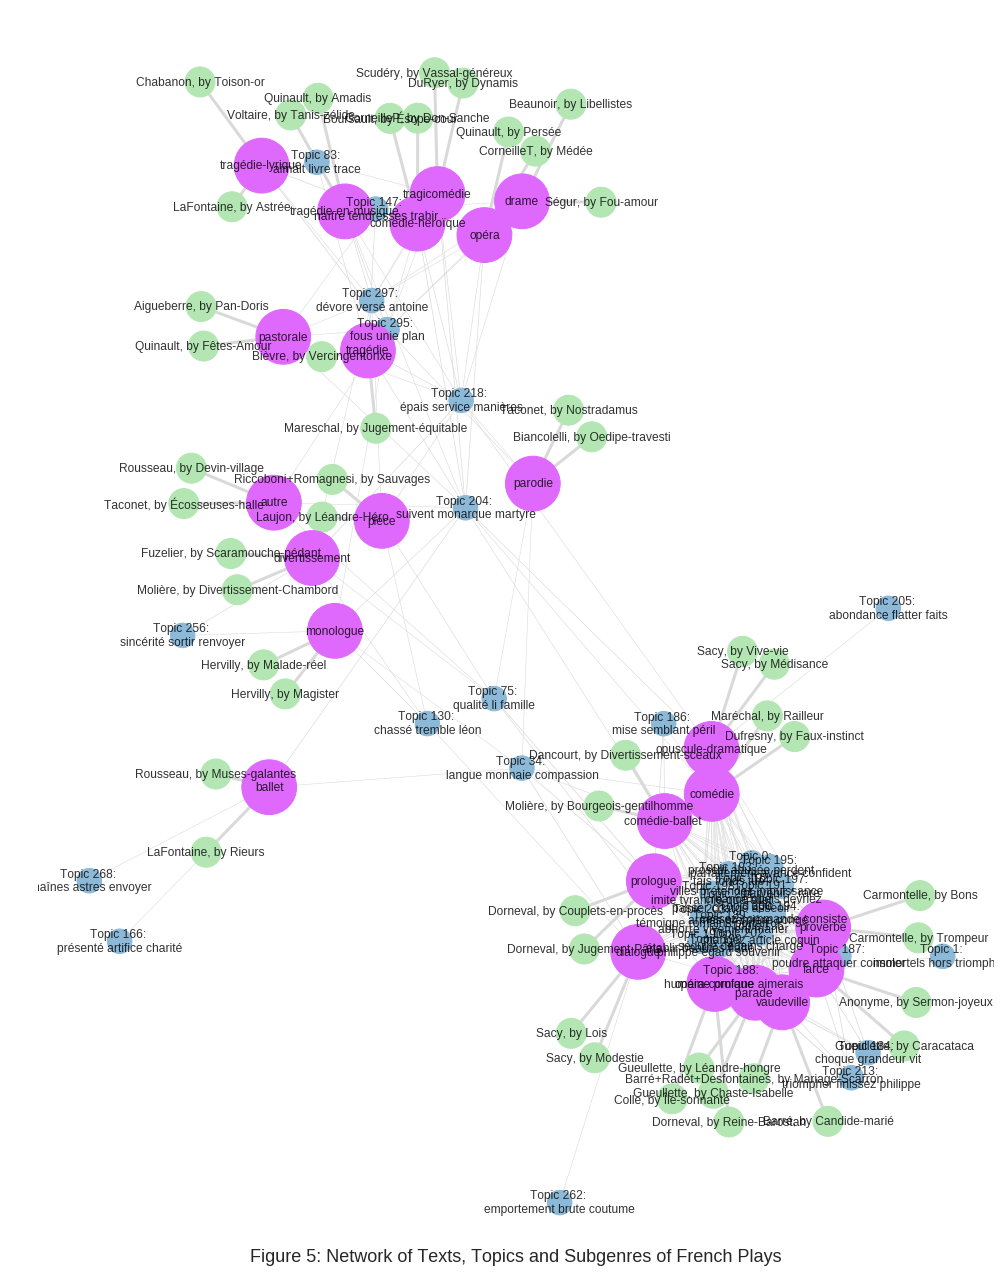

In [79]:
genre_as_graph.plot_graph(graph_gp, labels_list, weights_list, colors_list, sizes_list, wdir, savefig = True, pos_str = "spring", k = 10, iterations = 3000, figsize=(14,18), title = "Figure 5: Network of Texts, Topics and Subgenres of French Plays")

# Analyzing Graph

In [59]:
import networkx as nx

In [60]:
eigenvector_list = nx.eigenvector_centrality_numpy(graph_gp)

In [61]:
nodes_df

,node,size,type,label
autre,autre,10,subgenre,autre
ballet,ballet,10,subgenre,ballet
comédie,comédie,10,subgenre,comédie
comédie-ballet,comédie-ballet,10,subgenre,comédie-ballet
comédie-héroïque,comédie-héroïque,10,subgenre,comédie-héroïque
dialogue,dialogue,10,subgenre,dialogue
divertissement,divertissement,10,subgenre,divertissement
drame,drame,10,subgenre,drame
farce,farce,10,subgenre,farce
monologue,monologue,10,subgenre,monologue


In [62]:
genres_nodes_results_df = genres_nodes_df.copy()

In [63]:
genres_nodes_results_df["eigenvector"] = 0
for genre in genres_lt:
    if genre in genres_nodes_results_df.index.tolist():
        genres_nodes_results_df.loc[genre,"eigenvector"] = eigenvector_list[genre]

In [64]:
genres_nodes_results_df.sort_values(by="eigenvector")

,label,node,size,type,eigenvector
tragédie-lyrique,tragédie-lyrique,tragédie-lyrique,10,subgenre,0.001057
drame,drame,drame,10,subgenre,0.002483
pièce,pièce,pièce,10,subgenre,0.005820
divertissement,divertissement,divertissement,10,subgenre,0.005914
comédie-héroïque,comédie-héroïque,comédie-héroïque,10,subgenre,0.006532
opéra,opéra,opéra,10,subgenre,0.006532
pastorale,pastorale,pastorale,10,subgenre,0.006532
tragédie-en-musique,tragédie-en-musique,tragédie-en-musique,10,subgenre,0.006649
tragicomédie,tragicomédie,tragicomédie,10,subgenre,0.006649
tragédie,tragédie,tragédie,10,subgenre,0.006649


In [65]:
#results_classification_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/publications/202006_DH/data/bible/results_classification_csv",sep="\t",index_col=0)

In [66]:
results_classification_df

,Unnamed: 0,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
class,,,,,,,,,,,,,,
autre,7.625,0.524750,0.600000,0.487500,0.504125,0.568750,0.5,0.024750,162.5,True,4.992791e-01,20.0,10.0,3.0
ballet,23.750,0.291750,0.375000,0.250000,0.333250,0.437500,0.5,-0.208250,162.5,True,2.078217e-01,8.0,4.0,3.0
comédie,39.125,0.804500,0.889125,0.736500,0.779750,0.782875,0.5,0.304500,162.5,True,2.197458e-25,766.0,10.0,3.0
comédie-ballet,55.625,0.624875,0.731875,0.571250,0.583250,0.669500,0.5,0.124875,162.5,True,2.422983e-01,14.0,7.0,3.0
comédie-héroïque,71.375,0.565500,0.678500,0.508875,0.529875,0.624875,0.5,0.065500,162.5,True,4.146751e-01,14.0,7.0,3.0
dialogue,87.375,0.658375,0.800000,0.587500,0.549875,0.637500,0.5,0.158375,162.5,True,3.518665e-01,10.0,5.0,3.0
divertissement,103.375,0.437375,0.479125,0.416500,0.534750,0.625000,0.5,-0.062625,162.5,True,3.127598e-01,12.0,6.0,3.0
drame,119.500,0.584500,0.731250,0.508375,0.478750,0.565625,0.5,0.084500,162.5,True,3.807233e-01,28.0,10.0,3.0
farce,135.375,0.930000,0.987500,0.900125,0.881750,0.909375,0.5,0.430000,162.5,True,7.441469e-08,22.0,10.0,3.0


In [67]:
genres_nodes_results_df = pd.merge(genres_nodes_results_df, results_classification_df, left_index=True, right_index=True)

In [68]:
genres_nodes_results_df

,label,node,size,type,eigenvector,Unnamed: 0,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,MFW,typography,test_result_pvalue,sample_size,cv,sampling_times
autre,autre,autre,10,subgenre,0.007075,7.625,0.524750,0.600000,0.487500,0.504125,0.568750,0.5,0.024750,162.5,True,4.992791e-01,20.0,10.0,3.0
ballet,ballet,ballet,10,subgenre,0.009259,23.750,0.291750,0.375000,0.250000,0.333250,0.437500,0.5,-0.208250,162.5,True,2.078217e-01,8.0,4.0,3.0
comédie,comédie,comédie,10,subgenre,0.223285,39.125,0.804500,0.889125,0.736500,0.779750,0.782875,0.5,0.304500,162.5,True,2.197458e-25,766.0,10.0,3.0
comédie-ballet,comédie-ballet,comédie-ballet,10,subgenre,0.223285,55.625,0.624875,0.731875,0.571250,0.583250,0.669500,0.5,0.124875,162.5,True,2.422983e-01,14.0,7.0,3.0
comédie-héroïque,comédie-héroïque,comédie-héroïque,10,subgenre,0.006532,71.375,0.565500,0.678500,0.508875,0.529875,0.624875,0.5,0.065500,162.5,True,4.146751e-01,14.0,7.0,3.0
dialogue,dialogue,dialogue,10,subgenre,0.218068,87.375,0.658375,0.800000,0.587500,0.549875,0.637500,0.5,0.158375,162.5,True,3.518665e-01,10.0,5.0,3.0
divertissement,divertissement,divertissement,10,subgenre,0.005914,103.375,0.437375,0.479125,0.416500,0.534750,0.625000,0.5,-0.062625,162.5,True,3.127598e-01,12.0,6.0,3.0
drame,drame,drame,10,subgenre,0.002483,119.500,0.584500,0.731250,0.508375,0.478750,0.565625,0.5,0.084500,162.5,True,3.807233e-01,28.0,10.0,3.0
farce,farce,farce,10,subgenre,0.228079,135.375,0.930000,0.987500,0.900125,0.881750,0.909375,0.5,0.430000,162.5,True,7.441469e-08,22.0,10.0,3.0
monologue,monologue,monologue,10,subgenre,0.010986,151.375,0.666625,0.781250,0.609375,0.593750,0.671875,0.5,0.166625,162.5,True,4.224476e-01,8.0,4.0,3.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


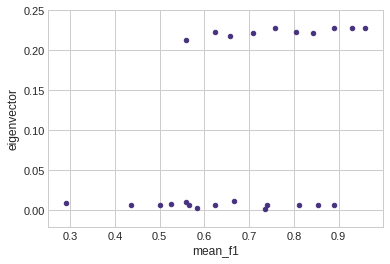

In [69]:
genres_nodes_results_df.plot.scatter("mean_f1", "eigenvector")

In [70]:
import scipy.stats as stats

In [71]:
stats.pearsonr(
genres_nodes_results_df["mean_f1"],
genres_nodes_results_df["eigenvector"]
)

(0.4425292576890297, 0.03035441895664685)

In [959]:
amounts_of_features_per_subgenre = [amount_of_features_per_subgenre]
amounts_of_texts_per_subgenre = [amount_of_texts_per_subgenre]
amounts_of_features_per_text = [amount_of_features_per_text]

stds_deviation_of_feature_in_subgenre = [std_deviation_of_feature_in_subgenre]
stds_deviation_of_feature_in_text = [std_deviation_of_feature_in_text]

results_distance_nodes_lt = []

#all_pairs_dct = dict(nx.all_pairs_dijkstra_path_length(graph_gp))

for subgenre_st1 in genres_nodes_results_df.sort_values(by="eigenvector", ascending=False).index.tolist():
    for subgenre_st2 in genres_nodes_results_df.sort_values(by="eigenvector", ascending=False).index.tolist():
        if subgenre_st1 != subgenre_st2:
            common_neighbors = len(list(nx.common_neighbors(graph_gp, subgenre_st1, subgenre_st2)))
            results_distance_nodes_lt.append([subgenre_st1, subgenre_st2, common_neighbors/(amounts_of_features_per_subgenre[0] + amounts_of_features_per_text[0])])
results_distance_nodes_df = pd.DataFrame(results_distance_nodes_lt, columns=["source","target","prop_common_neighbors"]).sort_values(by="prop_common_neighbors",ascending=False)
results_distance_nodes_df


,source,target,prop_common_neighbors
0,vaudeville,proverbe,0.80
23,proverbe,vaudeville,0.80
71,parade,farce,0.80
96,comédie,comédie-ballet,0.80
1,vaudeville,farce,0.80
48,farce,parade,0.80
47,farce,proverbe,0.80
46,farce,vaudeville,0.80
70,parade,proverbe,0.80
119,comédie-ballet,comédie,0.80


In [960]:
comp = nx.algorithms.community.centrality.girvan_newman(graph_gp)
comp_lt = list(sorted(c) for c in next(comp))
print(len(comp_lt))
i = 0
for community in comp_lt:
    print(i, community[0:3], len(community))
    for item in community:
        if item in genres_lt:
            print(item)
    i += 1

2
0 ['Topic 130: \nchassé tremble léon', 'Topic 147: \nnaître tendresses trahir', 'Topic 166: \nprésenté artifice charité'] 53
autre
ballet
comédie-héroïque
divertissement
drame
monologue
opéra
parodie
pastorale
pièce
tragicomédie
tragédie
tragédie-en-musique
tragédie-lyrique
1 ['Topic 0: \nproscrit abusée perdent', 'Topic 184: \nchoque grandeur vit', 'Topic 186: \nmise semblant péril'] 55
comédie
comédie-ballet 
dialogue
farce
opuscule-dramatique
opéra-comique
parade 
prologue
proverbe
vaudeville


In [961]:
comp_lt[1]

['Topic 0: \nproscrit abusée perdent',
 'Topic 184: \nchoque grandeur vit',
 'Topic 186: \nmise semblant péril',
 'Topic 187: \npoudre attaquer consoler',
 'Topic 188: \nhumaine profane aimerais',
 'Topic 189: \nabhorre vivement marier',
 'Topic 190: \nétablir beautés flatté',
 'Topic 191: \ncréance obéis devriez',
 'Topic 192: \nvilles prétendez impuissance',
 'Topic 193: \ntais fonds tué',
 'Topic 194: \ncessez commande consiste',
 'Topic 195: \nparfaitement avance confident',
 'Topic 196: \nchangez article coquin',
 'Topic 197: \nparvenir * rare',
 'Topic 198: \nimite tyrannie quereller',
 'Topic 199: \nphilippe égard souvenir',
 'Topic 1: \nimmortels hors triomphant',
 'Topic 200: \narmés première congé',
 'Topic 201: \npasser chargé asseoir',
 'Topic 202: \nséduire dédains chargé',
 'Topic 203: \ntémoigne romains portait',
 'Topic 205: \nabondance flatter faits',
 'Topic 213: \ntriompher finissez philippe',
 'Topic 262: \nemportement brute coutume',
 'Topic 34: \nlangue monnaie co